In [387]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2
from geopy.geocoders import Nominatim
import folium
from folium.plugins import MarkerCluster
from scipy.stats.mstats import ttest_ind
from scipy.stats import wilcoxon 
import math
import numpy as np
from scipy.stats import shapiro 
plt.style.use("seaborn")

In [4]:
df = pd.read_excel("final_df_all_yes.xlsx")

Date correction

In [472]:
df.first_activity_time = pd.to_datetime(df.first_activity_time)
df.last_activity_time = pd.to_datetime(df.last_activity_time)

In [258]:
df.columns

Index(['Unnamed: 0', 'artist_name', 'alias', 'email', 'Gender_from_name',
       'Gender_from_alias', 'final_gender', 'address', 'sold', 'N_of_items',
       'worth_in_tezos', 'author_location', 'author_country', 'twitter',
       'description', 'kind', 'bio_ig', 'website', 'balance',
       'author_description_twitter', 'site', 'instagram', 'telegram',
       'facebook', 'reddit', 'github', 'discord', 'first_activity',
       'first_activity_time', 'last_activity', 'last_activity_time'],
      dtype='object')

### Normality test

In [398]:
for t in x.columns:
    print(shapiro(x[t]))

ShapiroResult(statistic=0.2509807348251343, pvalue=0.0)
ShapiroResult(statistic=0.16345053911209106, pvalue=0.0)
ShapiroResult(statistic=0.15409332513809204, pvalue=0.0)
ShapiroResult(statistic=0.13436853885650635, pvalue=0.0)


Not normal data

### Diversity

In [5]:
df.head()

,Unnamed: 0,artist_name,alias,email,Gender_from_name,Gender_from_alias,final_gender,address,sold,N_of_items,...,instagram,telegram,facebook,reddit,github,discord,first_activity,first_activity_time,last_activity,last_activity_time
0,0,sintang_ligalig,sintang_ligalig,marlon.hacla@gmail.com,unknown,unknown,female,tz2G5SBeAJVbiE1icji3P59Lx8EvcwMLEHp3,507,701,...,NaN,NaN,NaN,NaN,NaN,NaN,1364121,2021-02-28 08:45:09,2622450,2022-08-14 22:42:29
1,1,KOSHA,KOSHA,rkoshino@gmail.com,unknown,unknown,male,tz1ZdMfzmWLb8mu22jE7rZ8Y3t9iKezM68cq,1330,1951,...,koshasnc,NaN,NaN,NaN,NaN,NaN,1340562,2021-02-11 19:46:46,2623436,2022-08-15 06:58:29
2,2,Mario Klingemann,Mario Klingemann,NaN,male,male,male,tz1hb9PiWxQEf6J9xevPsUM6dkuCLnhDMvsp,2967,4447,...,NaN,NaN,NaN,NaN,NaN,NaN,1358622,2021-02-24 12:21:06,2622274,2022-08-14 21:14:29
3,3,Tais Koshino,Tais Koshino,NaN,unknown,unknown,female,tz1U2wsJgebEvS6CZYXn1mjErRU5mSZ2ZS1Z,2118,4772,...,taiskoshino,NaN,NaN,NaN,NaN,NaN,1362035,2021-02-26 21:43:09,2623417,2022-08-15 06:48:59
4,4,Qartsi,Qartsi,quasiartsi@gmail.com,unknown,unknown,male,tz1PYqfNnkpZydtSY2Tn3Rv8mjkgUpHJpFXC,231,296,...,qartsi,NaN,NaN,NaN,NaN,NaN,189154,2018-11-14 23:52:44,2616283,2022-08-12 18:55:14


In [2]:
def get_continent(col):
    try:
        cn_a2_code =  country_name_to_country_alpha2(col)
    except:
        cn_a2_code = 'Unknown' 
    try:
        cn_continent = country_alpha2_to_continent_code(cn_a2_code)
    except:
        cn_continent = 'Unknown' 
    return (cn_a2_code, cn_continent)

In [12]:
codes = []
for t in df["author_location"]:
    codes.append(get_continent(t))


In [19]:
location = df[["alias","author_location"]]
location["codes"]=codes
location[["Country","Continent"]]=pd.DataFrame(location["codes"].tolist(), index=location.index)

<ipython-input-19-1885171b31e6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location["codes"]=codes
<ipython-input-19-1885171b31e6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location["Country"]=country
<ipython-input-19-1885171b31e6>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

In [25]:
geolocator = Nominatim(user_agent="habibi")
def geolocate(country):
    try:
        loc = geolocator.geocode(country)
        return (loc.latitude, loc.longitude)
    except:
        return np.nan

In [75]:
coordinates = []
for c in location["Country"]:
    coordinates.append(geolocate(c))

In [76]:
location["coordinates"]=coordinates

<ipython-input-76-a4d3f9670b87>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location["coordinates"]=coordinates


In [77]:
ind = location[location["Country"]=="Unknown"].index
location.drop(ind, inplace=True)
location

<ipython-input-77-9051c9de17ff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location.drop(ind, inplace=True)


,alias,author_location,codes,Country,Continent,coordinates,Longitude,Latitude
1,KOSHA,Brazil,"(BR, SA)",BR,SA,"(-10.3333333, -53.2)",-10.333333,-53.200000
2,Mario Klingemann,Germany,"(DE, EU)",DE,EU,"(51.1638175, 10.4478313)",51.163818,10.447831
3,Tais Koshino,Brazil,"(BR, SA)",BR,SA,"(-10.3333333, -53.2)",-10.333333,-53.200000
4,Qartsi,South Africa,"(ZA, AF)",ZA,AF,"(-28.8166236, 24.991639)",-28.816624,24.991639
5,apol_stamaria,Philippines,"(PH, AS)",PH,AS,"(12.7503486, 122.7312101)",12.750349,122.731210
...,...,...,...,...,...,...,...,...
2900,Daniel Bretas,Brazil,"(BR, SA)",BR,SA,"(-10.3333333, -53.2)",-10.333333,-53.200000
2902,Dr D Foothead,United States,"(US, NA)",US,NA,"(39.7837304, -100.445882)",39.783730,-100.445882
2904,uwabami,Serbia,"(RS, EU)",RS,EU,"(44.1534121, 20.55144)",44.153412,20.551440
2905,KVAN,Georgia,"(GE, AS)",GE,AS,"(41.6809707, 44.0287382)",32.329381,-83.113737


In [277]:
coun = location[["author_location","coordinates"]].groupby("author_location").count()
def calculate_blau_index(data):
    total_population = data.sum()
    squared_population = data.apply(lambda x: x**2)
    blau_index = squared_population.sum() / (total_population ** 2)
    return blau_index
1-calculate_blau_index(coun["coordinates"])

0.8860152474171591

,coordinates,blaus
author_location,,
Argentina,31,0.829156
Australia,31,0.829156
Austria,8,0.988622
Bahrain,1,0.999822
Belarus,1,0.999822
...,...,...
United Kingdom,130,-2.004444
United States,366,-22.814400
Uruguay,2,0.999289


In [78]:
location[["Longitude","Latitude"]]=pd.DataFrame(location["coordinates"].tolist(), index=location.index)

<ipython-input-78-25a97975c4b1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location[["Longitude","Latitude"]]=pd.DataFrame(location["coordinates"].tolist(), index=location.index)


In [79]:
location.dropna(inplace=True)

<ipython-input-79-8e9d8775c1f6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location.dropna(inplace=True)


In [101]:
popo = location.groupby(["Country","Longitude","Latitude"]).count()[["alias"]]/1521
popo

,,,alias
Country,Longitude,Latitude,
AE,24.000249,53.999483,0.001972
AR,-34.996496,-64.967282,0.020381
AT,47.593970,14.124560,0.005260
AU,-24.776109,134.755000,0.020381
BE,50.640281,4.666715,0.009862
...,...,...,...
US,39.783730,-100.445882,0.240631
UY,-32.875555,-56.020153,0.001315
VE,8.001871,-66.110932,0.001315


In [105]:
fofo=popo.reset_index()


-64.9672817

In [ ]:
world_map= folium.Map(tiles="cartodbpositron")
marker_cluster = MarkerCluster().add_to(world_map)

for i in range(len(fofo)):
        lat = fofo.iloc[i]['Latitude']
        long = fofo.iloc[i]['Longitude']
        radius=5
        popup_text = """Country : {}<br>
                    %of Users : {}<br>"""
        popup_text = popup_text.format(fofo.iloc[i]['Country'],
                                   fofo.iloc[i]['alias']
                                   )
        folium.CircleMarker(location = [lat, long], radius=radius, popup= popup_text, fill =True).add_to(marker_cluster)
#show the map
world_map

## Disparity

In [108]:
df.columns

Index(['Unnamed: 0', 'artist_name', 'alias', 'email', 'Gender_from_name',
       'Gender_from_alias', 'final_gender', 'address', 'sold', 'N_of_items',
       'worth_in_tezos', 'author_location', 'author_country', 'twitter',
       'description', 'kind', 'bio_ig', 'website', 'balance',
       'author_description_twitter', 'site', 'instagram', 'telegram',
       'facebook', 'reddit', 'github', 'discord', 'first_activity',
       'first_activity_time', 'last_activity', 'last_activity_time'],
      dtype='object')

In [110]:
disparity = df[['alias','final_gender', 'sold', 'N_of_items', 'worth_in_tezos', 'balance']]

{'whiskers': [<matplotlib.lines.Line2D at 0x1b20ab77160>,
 'caps': [<matplotlib.lines.Line2D at 0x1b20ab77700>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b20ab69f70>],
 'medians': [<matplotlib.lines.Line2D at 0x1b20ab77ca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b20ab77fa0>],
 'means': []}

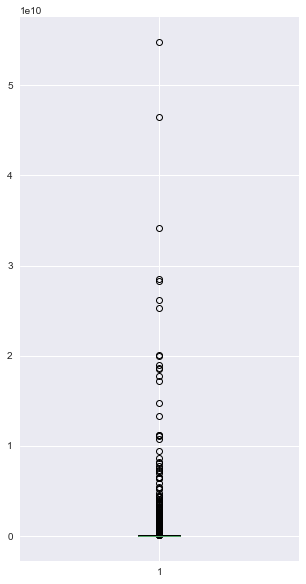

In [218]:
plt.figure(figsize=(5,10))
plt.boxplot(disparity["balance"], showfliers=True, )

In [124]:
print("The median in balance of NFT users: ", disparity.balance.median(),"tz")
print("The average in balance of NFT users: ",disparity.balance.mean(),"tz")
print("Q1: ", np.percentile(disparity.balance, q=25),"tz")
print("Q2: ",np.percentile(disparity.balance, q=75), "tz")

The median in balance of NFT users:  12371902.0 tz
The average in balance of NFT users:  353028057.1754386 tz
Q1:  1871959.5 tz
Q2:  71095741.5 tz


In [136]:
print("Percentage of artists below the average: ", disparity[disparity.balance < 353028057.1754386].balance.count()*100/len(disparity))
print("Percentage of artists above the average: ", disparity[disparity.balance >= 353028057.1754386].balance.count()*100/len(disparity))

Percentage of artists below the average:  89.54248366013071
Percentage of artists above the average:  10.457516339869281


In [143]:
disparity["sales_ratio"] = round(100*disparity['sold']/disparity['N_of_items'],2)

<ipython-input-143-ca5dd5e02346>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disparity["sales_ratio"] = round(100*disparity['sold']/disparity['N_of_items'],2)


42.134396284829684


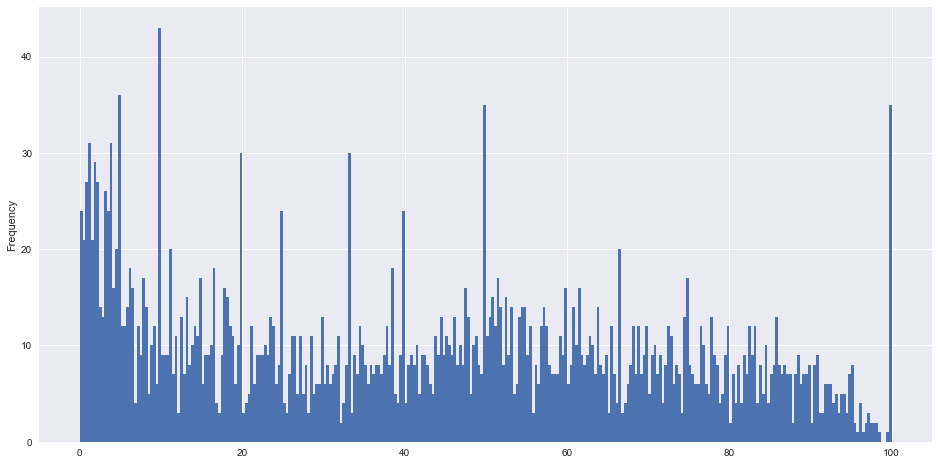

In [249]:
disparity["sales_ratio"].plot.hist(figsize=(16,8),bins=300)

In [162]:
print("The median of NFTs worth of artists: ", disparity.worth_in_tezos.median(),"tz")
print("The average of NFTs worth of artists: ",disparity.worth_in_tezos.mean(),"tz")
print("Q1: ", np.percentile(disparity.worth_in_tezos, q=25),"tz")
print("Q2: ",np.percentile(disparity.worth_in_tezos, q=75), "tz")

The median of NFTs worth of artists:  19.0 tz
The average of NFTs worth of artists:  164.95778825318192 tz
Q1:  5.0 tz
Q2:  80.25 tz


In [163]:
print("Percentage of artists below the average: ", disparity[disparity.worth_in_tezos < 164.95778825318192].worth_in_tezos.count()*100/len(disparity))
print("Percentage of artists above the average: ", disparity[disparity.worth_in_tezos >= 164.95778825318192].worth_in_tezos.count()*100/len(disparity))

Percentage of artists below the average:  84.6233230134159
Percentage of artists above the average:  15.376676986584107


Text(2930, 650.95, 'Average')

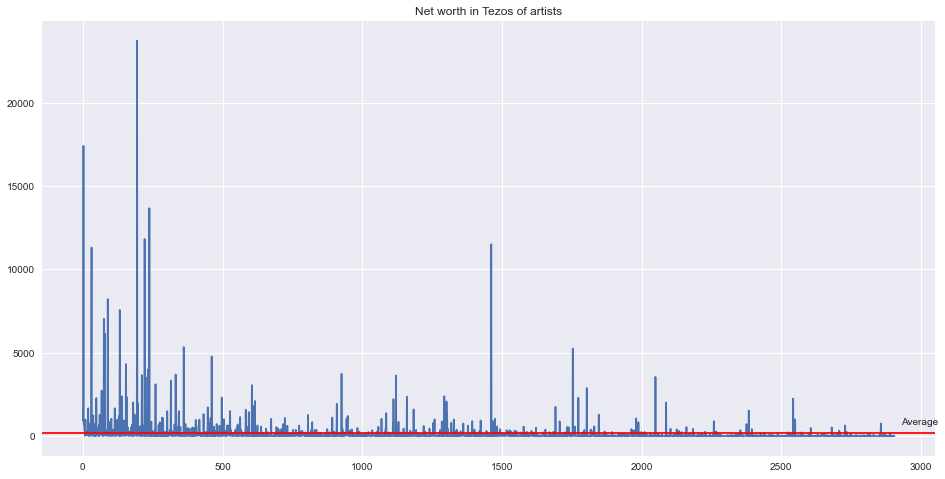

In [248]:
plt.figure(figsize=(16,8))
plt.plot(disparity["worth_in_tezos"])
plt.axhline(164.95, color="red")
plt.title("Net worth in Tezos of artists")
plt.annotate(xy=(2930,650.95), text="Average")

Text(2930, 904128067, 'Average')

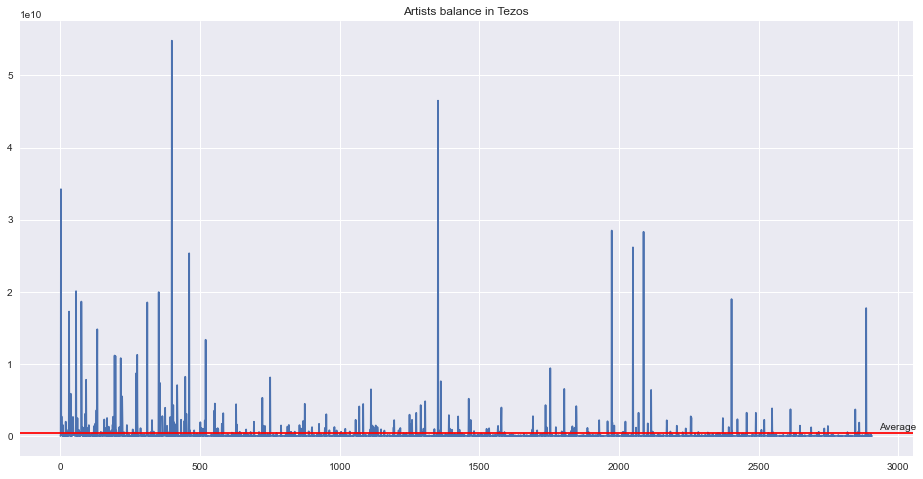

In [243]:
plt.figure(figsize=(16,8))
plt.plot(disparity["balance"])
plt.axhline(353028057.17, color="red")
plt.title("Artists balance in Tezos")
plt.annotate(xy=(2930,904128067), text="Average")

## Gender equality

In [200]:
gender = df[['alias','final_gender', 'sold', 'N_of_items','worth_in_tezos', 'balance']]
gender["sales_ratio"] = round(100*gender['sold']/gender['N_of_items'],2)

<ipython-input-200-7fb19989dfa2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gender["sales_ratio"] = round(100*gender['sold']/gender['N_of_items'],2)


In [194]:
print(f"Distribution of males and females: {gender.final_gender.value_counts()}")

Distribution of males and females: male       1664
unknown     685
female      558
Name: final_gender, dtype: int64


In [208]:
print(f"""Percentage of wealth held by males: {100*(gender[gender["final_gender"]=="male"]["worth_in_tezos"].sum()/gender["worth_in_tezos"].sum())}""")
print(f"""Percentage of wealth held by females: {100*(gender[gender["final_gender"]=="female"]["worth_in_tezos"].sum()/gender["worth_in_tezos"].sum())}""")
print("\n")
print(f"""Percentage of total balance held by males: {100*(gender[gender["final_gender"]=="male"]["balance"].sum()/gender["balance"].sum())}""")
print(f"""Percentage of total balance held by females: {100*(gender[gender["final_gender"]=="female"]["balance"].sum()/gender["balance"].sum())}""")

Percentage of wealth held by males: 68.4046899414867
Percentage of wealth held by females: 17.7051432594816


Percentage of total balance held by males: 60.69362911711301
Percentage of total balance held by females: 20.92419316710738


In [190]:
print(f"""The Tezos worth held by the top wealthy males (net worth comparison): 
{gender[gender["final_gender"]=="male"].nlargest(columns=["worth_in_tezos"], n=20)["worth_in_tezos"].sum()}
""")
print("\n")
print(f"""The Tezos worth held by the top wealthy females (net worth comparison): 
{gender[gender["final_gender"]=="female"].nlargest(columns=["worth_in_tezos"], n=20)["worth_in_tezos"].sum()}
""")
print("\n")
print(f"Percentage of wealth held by top 20 wealthy women over top 20 wealthy males: {100*48519.55/(48519.55+145089.86)}")

The Tezos worth held by the top wealthy males (net worth comparison): 
145089.86000000002



The Tezos worth held by the top wealthy females (net worth comparison): 
48519.55



Percentage of wealth held by top 20 wealthy women over top 20 wealthy males: 25.060532956533468


In [204]:
# important
print(f"""Ratio of sold items for males: {gender[gender["final_gender"]=="male"]["sales_ratio"].mean()}""")
print(f"""Ratio of sold items for females: {gender[gender["final_gender"]=="female"]["sales_ratio"].mean()}""")

Ratio of sold items for males: 42.103058894230756
Ratio of sold items for females: 42.91082437275984


In [179]:
gender_num=[]
for t in gender["final_gender"]:
    if t=="female":
        gender_num.append(1)
    elif t=="male":
        gender_num.append(0)
    else:
        gender_num.append(2)

In [210]:
gender["gender_num"] = gender_num

<ipython-input-210-612a43705386>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gender["gender_num"] = gender_num


In [279]:
print(wilcoxon(gender["gender_num"], gender["worth_in_tezos"]))
print(wilcoxon(gender["gender_num"], gender["balance"]))
print(wilcoxon(gender["gender_num"], gender["sold"]))
print(wilcoxon(gender["gender_num"], gender["N_of_items"]))
print(wilcoxon(gender["gender_num"], gender["sales_ratio"]))

WilcoxonResult(statistic=18249.5, pvalue=0.0)
WilcoxonResult(statistic=1848.0, pvalue=0.0)
WilcoxonResult(statistic=8320.0, pvalue=0.0)
WilcoxonResult(statistic=9.5, pvalue=0.0)
WilcoxonResult(statistic=3769.0, pvalue=0.0)


## Clustering

In [357]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [601]:
clustering = df[[ 'alias',
        'sold', 'N_of_items',
       'worth_in_tezos', 'balance', 'first_activity_time', 'last_activity_time']]
clustering["gender"]=gender["gender_num"]
clustering["active_days"] = (clustering['last_activity_time'] - clustering['first_activity_time']) / np.timedelta64(1, 'D')
x=clustering[['sold', 'N_of_items','worth_in_tezos', 'balance', 'gender', 'active_days']].reset_index().drop("index", axis=1)
x

<ipython-input-601-6486b73fbe55>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering["gender"]=gender["gender_num"]
<ipython-input-601-6486b73fbe55>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering["active_days"] = (clustering['last_activity_time'] - clustering['first_activity_time']) / np.timedelta64(1, 'D')


,sold,N_of_items,worth_in_tezos,balance,gender,active_days
0,507,701,922.00,3519498,1,532.581481
1,1330,1951,1901.98,168246765,0,549.466470
2,2967,4447,17423.30,34221949698,0,536.370405
3,2118,4772,712.04,144861485,1,534.379051
4,231,296,953.77,2722244269,0,1366.793403
...,...,...,...,...,...,...
2902,1,50,1.00,7714985,0,274.385359
2903,1,33,3.00,101927,2,272.826215
2904,2,50,1.60,22310826,1,273.470590
2905,2,20,0.60,303716,0,270.860567


### Standardizing the dataset

In [480]:
scaler = StandardScaler()
scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
scaled

,sold,N_of_items,worth_in_tezos,balance,gender,active_days
0,0.499449,0.066089,0.895557,-0.159734,0.404073,1.103028
1,1.827839,0.607132,2.054843,-0.084450,-0.795764,1.287564
2,4.470093,1.687487,20.416076,15.478922,-0.795764,1.144438
3,3.099736,1.828158,0.647181,-0.095137,0.404073,1.122674
4,0.053962,-0.109209,0.933140,1.082790,-0.795764,10.220128
...,...,...,...,...,...,...
2902,-0.317278,-0.215686,-0.193957,-0.157816,-0.795764,-1.718796
2903,-0.317278,-0.223045,-0.191591,-0.161296,1.603910,-1.735836
2904,-0.315663,-0.215686,-0.193247,-0.151146,0.404073,-1.728794
2905,-0.315663,-0.228671,-0.194430,-0.161204,-0.795764,-1.757319


#### Elbow Method

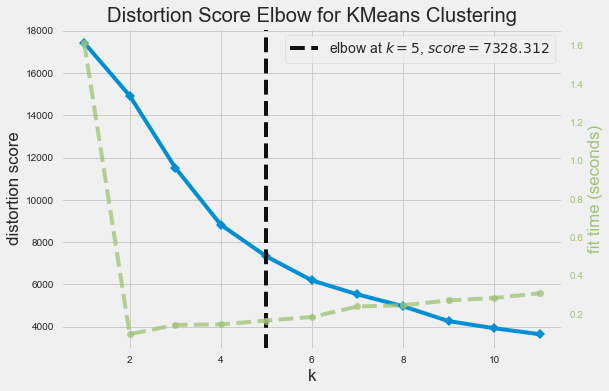

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [502]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))
visualizer.fit(scaled)        
visualizer.show() 

### Dimension reduction

#### PCA

In [498]:
pca=PCA(n_components=2)
reduced = pca.fit_transform(scaled)
red = pd.DataFrame(reduced, columns=["comp1","comp2"])

In [648]:
model = KMeans(n_clusters=5)
model.fit(red)
red["cluster"] = model.labels_
centroids = model.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

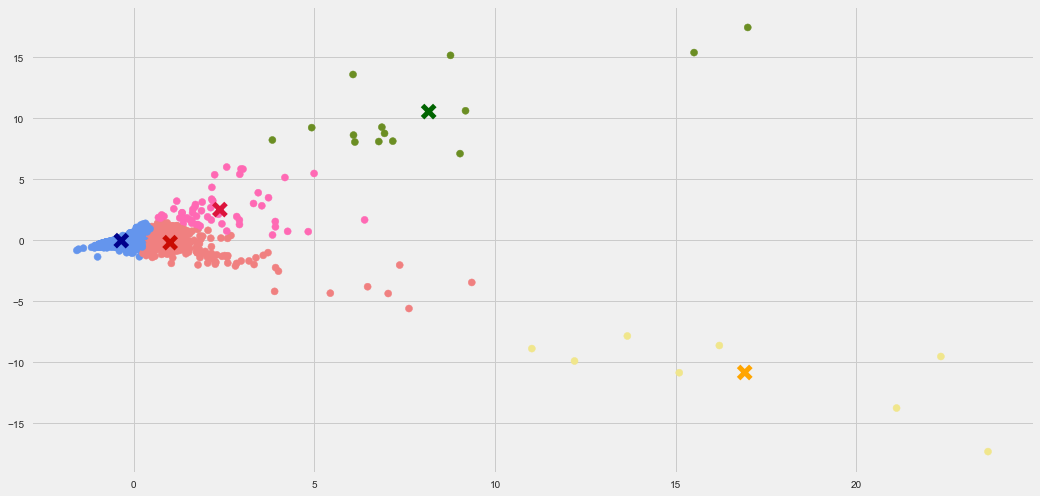

In [649]:
plt.figure(figsize=(16,8))
colors=["lightcoral","cornflowerblue","olivedrab", "khaki", "hotpink"]
plt.scatter(x=red["comp1"],y=red["comp2"], color=[colors[l_] for l_ in model.labels_])
plt.scatter(centroids_x,centroids_y, marker = "x", s=150,linewidths = 5, zorder = 10, c=['r', 'darkblue','darkgreen', "orange","crimson"])

#### Silhouette method

For n_clusters = 2 The average silhouette_score is : 0.9404428986615262
For n_clusters = 3 The average silhouette_score is : 0.9130489769049245
For n_clusters = 4 The average silhouette_score is : 0.639288340281661
For n_clusters = 5 The average silhouette_score is : 0.41471216233968716
For n_clusters = 6 The average silhouette_score is : 0.41898256191538125


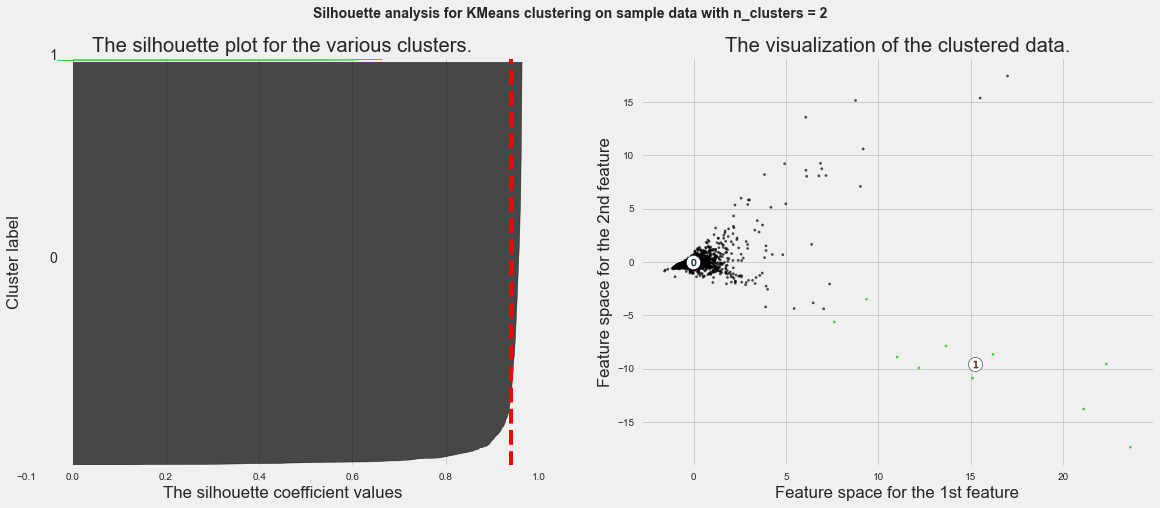

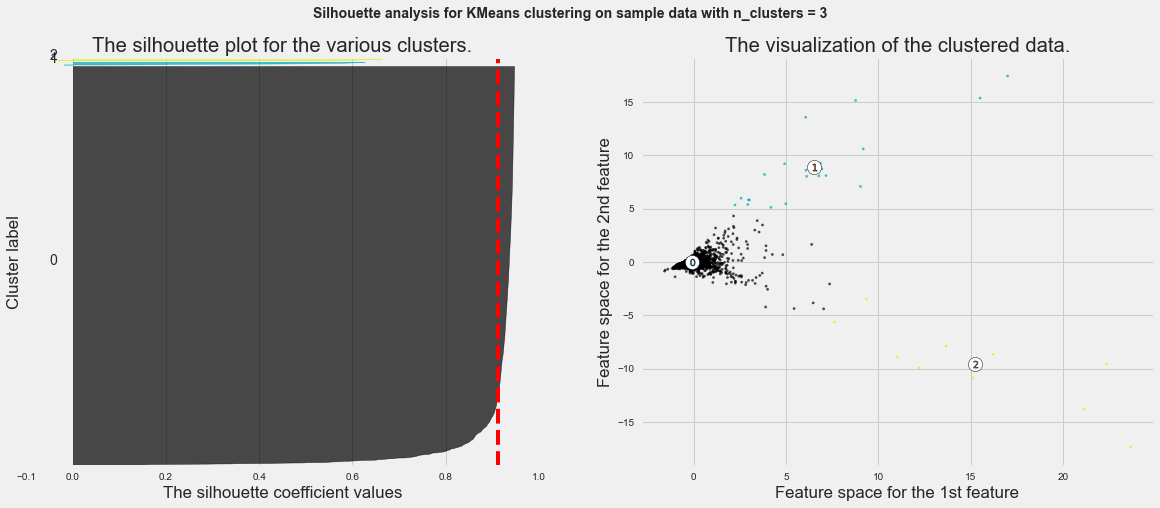

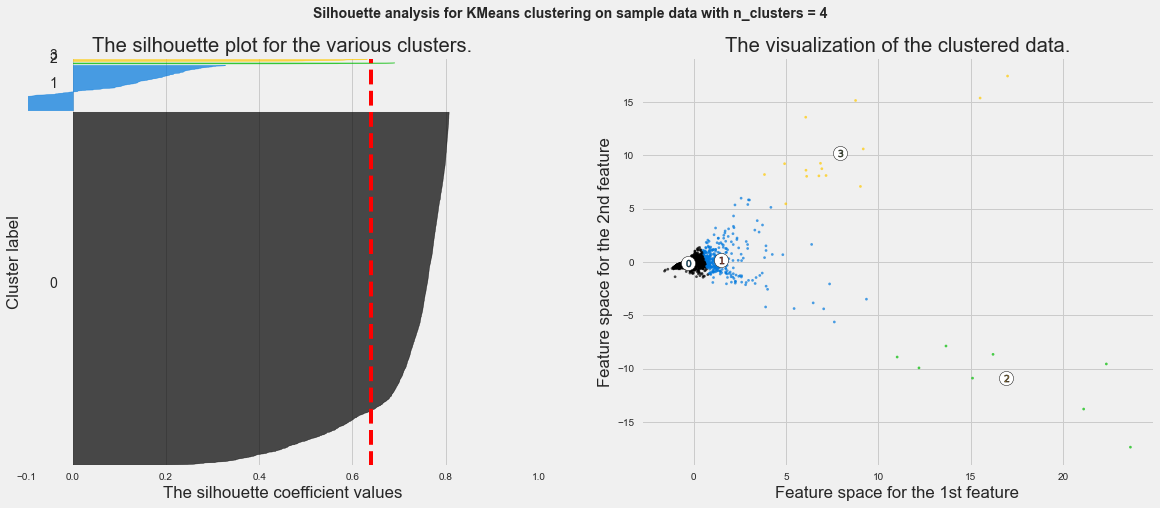

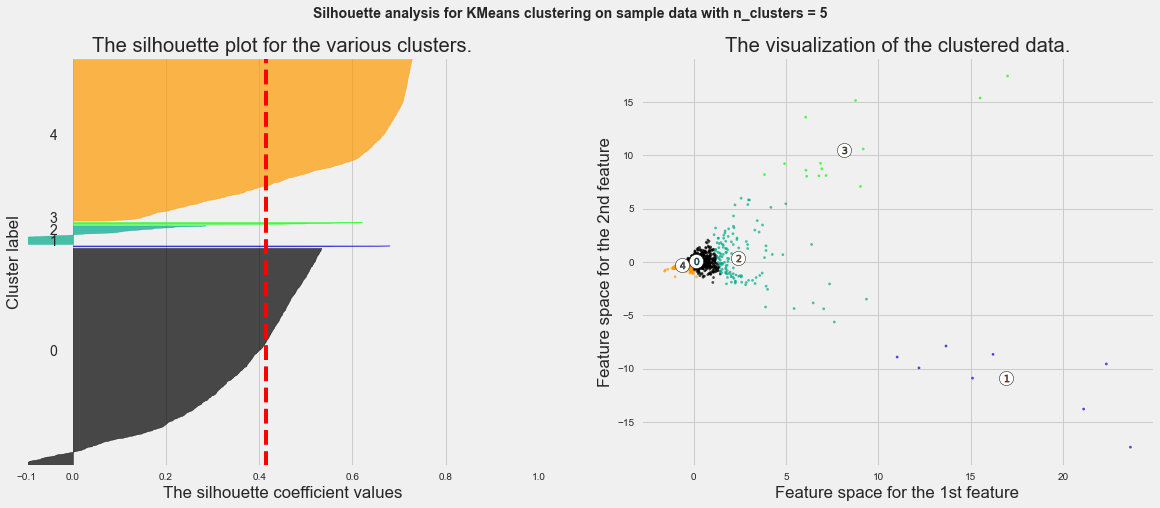

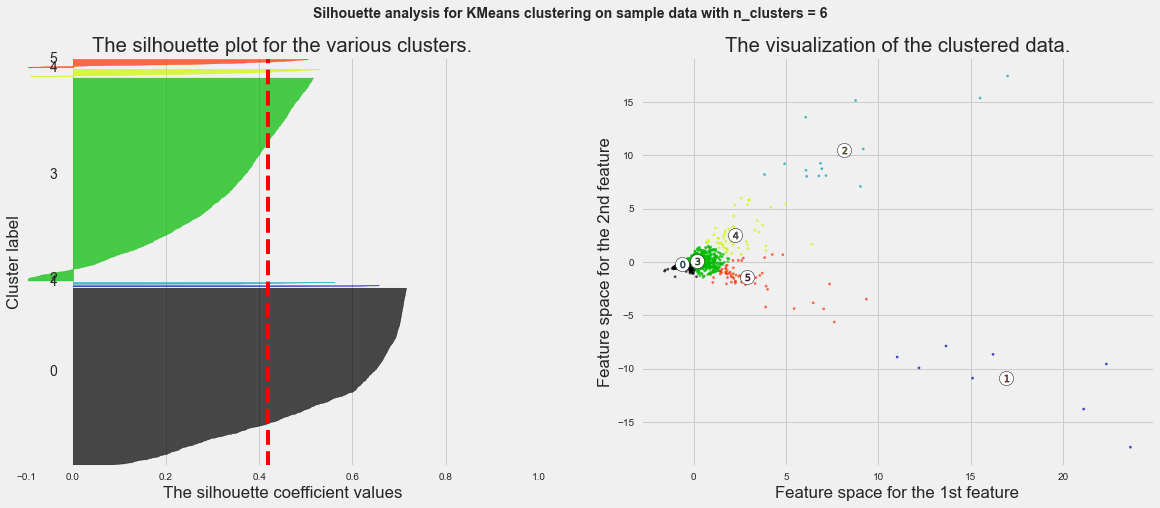

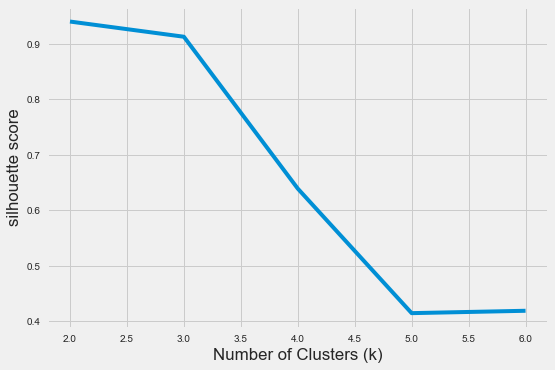

In [500]:

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.cm as cm
import numpy as np
import matplotlib.style as style

range_n_clusters = [2, 3, 4, 5, 6]
silhouette_avg_n_clusters = []

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(reduced) + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(reduced)
    silhouette_avg = silhouette_score(reduced, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    silhouette_avg_n_clusters.append(silhouette_avg)
    sample_silhouette_values = silhouette_samples(reduced, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10 

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(reduced[:, 0], reduced[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')


    centers = clusterer.cluster_centers_

    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


style.use("fivethirtyeight")
plt.plot(range_n_clusters, silhouette_avg_n_clusters)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("silhouette score")
plt.show()

#### T-sne preparation

In [529]:
from sklearn.manifold import TSNE
red_tsne = pd.DataFrame(TSNE(n_components=2, learning_rate='auto', init='pca').fit_transform(scaled),columns=("comp1","comp2"))
red_tsne

c:\Users\farou\anaconda3\envs\myenv\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


,comp1,comp2
0,5.556055,-11.777953
1,14.133216,0.347894
2,20.334435,-4.560185
3,-0.226789,2.923460
4,43.331192,1.643585
...,...,...
2902,-62.666695,-11.506703
2903,-23.296362,-56.964241
2904,-41.102467,-31.603838
2905,-63.257484,-12.575591


### Clustering with 5

In [527]:
model = KMeans(n_clusters=5)
model.fit(scaled)
red_tsne["cluster"] = model.labels_
centroids = model.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

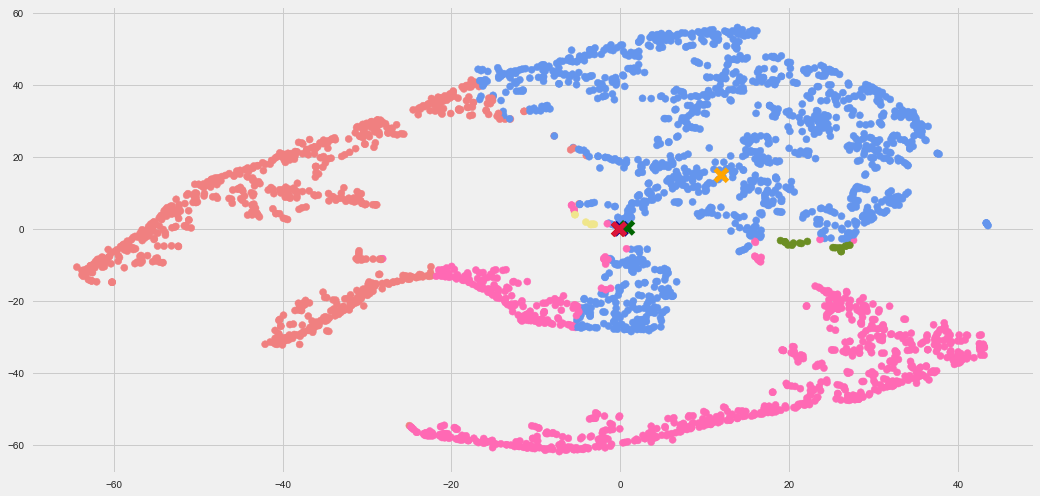

In [528]:
plt.figure(figsize=(16,8))
colors=["lightcoral","cornflowerblue","olivedrab", "khaki", "hotpink"]
plt.scatter(x=red_tsne["comp1"],y=red_tsne["comp2"], color=[colors[l_] for l_ in model.labels_])
plt.scatter(centroids_x,centroids_y, marker = "x", s=150,linewidths = 5, zorder = 10, c=['r', 'darkblue','darkgreen', "orange","crimson"])

#### Clustering with 3

In [530]:
model = KMeans(n_clusters=3)
model.fit(scaled)
red_tsne["cluster"] = model.labels_
centroids = model.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

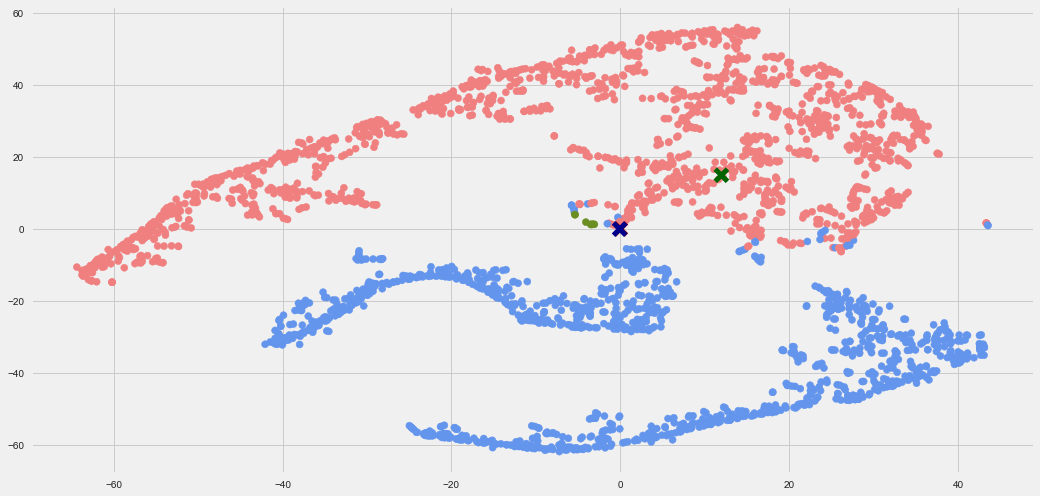

In [532]:
plt.figure(figsize=(16,8))
colors=["lightcoral","cornflowerblue","olivedrab"]
plt.scatter(x=red_tsne["comp1"],y=red_tsne["comp2"], color=[colors[l_] for l_ in model.labels_])
plt.scatter(centroids_x,centroids_y, marker = "x", s=150,linewidths = 5, zorder = 10, c=['darkred', 'darkblue','darkgreen'])


#### Davies-Bouldin score

In [535]:
from sklearn.metrics import davies_bouldin_score
kmeans = KMeans(n_clusters=5)
labels = kmeans.fit_predict(scaled)
db_index = davies_bouldin_score(scaled, labels)
print(db_index)

0.9097738365574536


In [536]:
from sklearn.metrics import davies_bouldin_score
kmeans = KMeans(n_clusters=3)
labels = kmeans.fit_predict(scaled)
db_index = davies_bouldin_score(scaled, labels)
print(db_index)

1.0751016018000739


### Comparaison of the two suggested cluster numbers

In [602]:
clus_3 = x.copy()
clus_3["alias"] = clustering["alias"]
kmeans_3 = KMeans(n_clusters=3)
kmeans_3.fit(scaled)
labels_3 = kmeans_3.labels_
clus_3["cluster_3"]=labels_3

In [604]:
clus_5 = x.copy()
clus_5["alias"] = clustering["alias"]
kmeans_5 = KMeans(n_clusters=5)
kmeans_5.fit(scaled)
labels_5 = kmeans_5.labels_
clus_5["cluster_5"]=labels_5

In [614]:
cols=["sold","N_of_items","worth_in_tezos","balance","active_days"]

In [638]:
clus_3[clus_3["cluster_3"]==0].describe(percentiles=[])[cols] # majority of artists with lower of active days than other clusters on average

,sold,N_of_items,worth_in_tezos,balance,active_days
count,2883.000000,2883.000000,2883.000000,2.883000e+03,2883.000000
mean,170.554977,446.356920,118.516556,2.412321e+08,431.060268
std,333.081129,1192.233757,363.256111,1.131565e+09,91.605625
min,1.000000,1.000000,0.010000,0.000000e+00,41.568947
50%,53.000000,154.000000,18.500000,1.220000e+07,468.824132
max,5682.000000,31083.000000,6154.500000,2.008415e+10,1366.793403


In [640]:
clus_3[clus_3["cluster_3"]==1].describe(percentiles=[])[cols] # high number of sales with normal balance and owned items and average number of active days

,sold,N_of_items,worth_in_tezos,balance,active_days
count,8.000000,8.00000,8.000000,8.000000e+00,8.000000
mean,8552.750000,35450.87500,1145.812500,5.575849e+07,497.271314
std,5585.440966,15106.92936,2039.220744,9.439397e+07,52.394258
min,9.000000,20899.00000,3.370000,8.780200e+04,371.783148
50%,10094.500000,28956.50000,18.265000,7.440766e+06,515.443987
max,16066.000000,60155.00000,5822.350000,2.588461e+08,529.578819


In [639]:
clus_3[clus_3["cluster_3"]==2].describe(percentiles=[])[cols]# high number balance and worth and normal number of sales

,sold,N_of_items,worth_in_tezos,balance,active_days
count,16.000000,16.000000,16.000000,1.600000e+01,16.000000
mean,887.437500,1467.937500,8042.660000,2.064590e+10,505.958083
std,796.193106,1498.539799,6638.514932,1.549586e+10,26.322413
min,30.000000,101.000000,20.000000,1.520832e+09,444.737639
50%,760.000000,1091.500000,7303.500000,1.794810e+10,518.095052
max,2967.000000,5403.000000,23735.000000,5.481141e+10,536.370405


In [642]:
clus_5[clus_5["cluster_5"]==0].describe(percentiles=[])[cols] # big mass, big number of active days, average balance and sales and actuve days

,sold,N_of_items,worth_in_tezos,balance,active_days
count,1192.00000,1192.000000,1192.000000,1.192000e+03,1192.000000
mean,257.64094,591.864933,204.212787,3.698275e+08,490.979264
std,414.59058,1110.060158,487.039019,1.133226e+09,59.502717
min,1.00000,1.000000,0.020000,0.000000e+00,391.170521
50%,109.00000,253.000000,44.925000,3.100191e+07,491.717604
max,5348.00000,14506.000000,6154.500000,1.334710e+10,1366.793403


In [643]:
clus_5[clus_5["cluster_5"]==1].describe(percentiles=[])[cols] # mid sales mid balance and mid number of active days, but low worth in tezos

,sold,N_of_items,worth_in_tezos,balance,active_days
count,969.000000,969.000000,969.000000,9.690000e+02,969.000000
mean,137.031992,367.113519,76.303399,1.506678e+08,438.905155
std,285.876028,1019.488726,255.170091,5.766510e+08,74.242594
min,1.000000,1.000000,0.010000,1.000000e+00,239.551412
50%,45.000000,134.000000,15.800000,1.289897e+07,470.589537
max,5682.000000,20959.000000,3742.500000,1.079588e+10,731.361887


In [644]:
clus_5[clus_5["cluster_5"]==2].describe(percentiles=[])[cols] # hugh number of sales of owned items and active days

,sold,N_of_items,worth_in_tezos,balance,active_days
count,9.000000,9.000000,9.000000,9.000000e+00,9.000000
mean,7612.444444,34965.555556,1463.198889,5.227886e+07,502.512737
std,5937.598654,14206.045017,2131.953486,8.891239e+07,51.471022
min,9.000000,20899.000000,3.370000,8.780200e+04,371.783148
50%,10025.000000,31083.000000,20.110000,1.110216e+07,520.233160
max,16066.000000,60155.000000,5822.350000,2.588461e+08,544.444120


In [645]:
clus_5[clus_5["cluster_5"]==3].describe(percentiles=[])[cols] # low sales and balance and worth in tezos

,sold,N_of_items,worth_in_tezos,balance,active_days
count,716.000000,716.000000,716.000000,7.160000e+02,716.000000
mean,71.002793,270.196927,27.801389,1.864806e+07,319.568123
std,161.064344,938.857544,66.830679,5.801455e+07,41.247372
min,1.000000,1.000000,0.010000,1.000000e+00,41.568947
50%,12.000000,82.000000,8.250000,3.768168e+06,311.214711
max,1521.000000,20109.000000,1104.350000,6.554250e+08,409.484051


In [646]:
clus_5[clus_5["cluster_5"]==4].describe(percentiles=[])[cols] # high number of active days and worth and balance in tezos 

,sold,N_of_items,worth_in_tezos,balance,active_days
count,21.00000,21.000000,21.000000,2.100000e+01,21.000000
mean,718.52381,1169.238095,6147.527143,2.026660e+10,520.975400
std,760.21455,1411.950137,6717.497264,1.344503e+10,68.454165
min,5.00000,9.000000,2.000000,1.520832e+09,444.737639
50%,468.00000,689.000000,4775.000000,1.864165e+10,520.362789
max,2967.00000,5403.000000,23735.000000,5.481141e+10,799.733125
